In [1]:
import pandas as pd


In [3]:
data = pd.read_csv('penguins_size.csv')
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [31]:
# clear data drop an
data.dropna(inplace=True)

In [7]:
data.columns = ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass','gender'  ]


In [8]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<Axes: title={'center': 'Species Count'}, xlabel='species'>

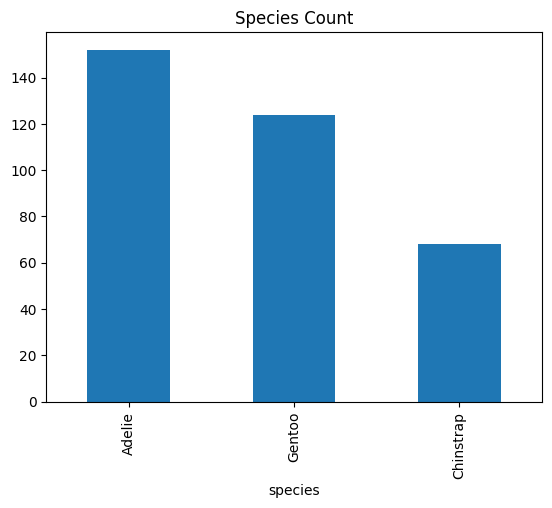

In [14]:
## plot speicies 
data.value_counts('species').plot(kind='bar', title='Species Count')

<Axes: title={'center': 'Island Count'}, xlabel='island'>

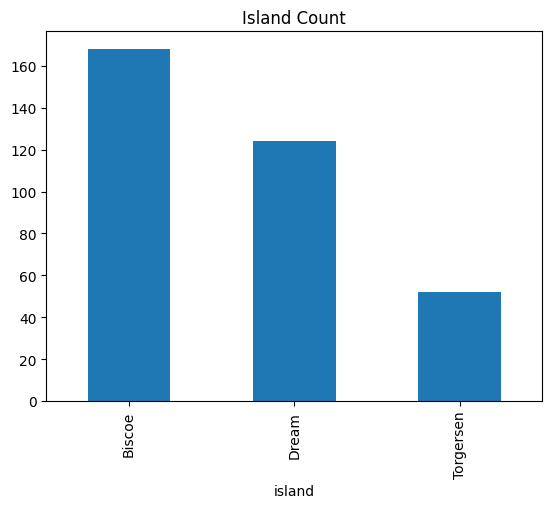

In [15]:
data.value_counts('island').plot(kind='bar', title='Island Count')

In [18]:
import seaborn as sns

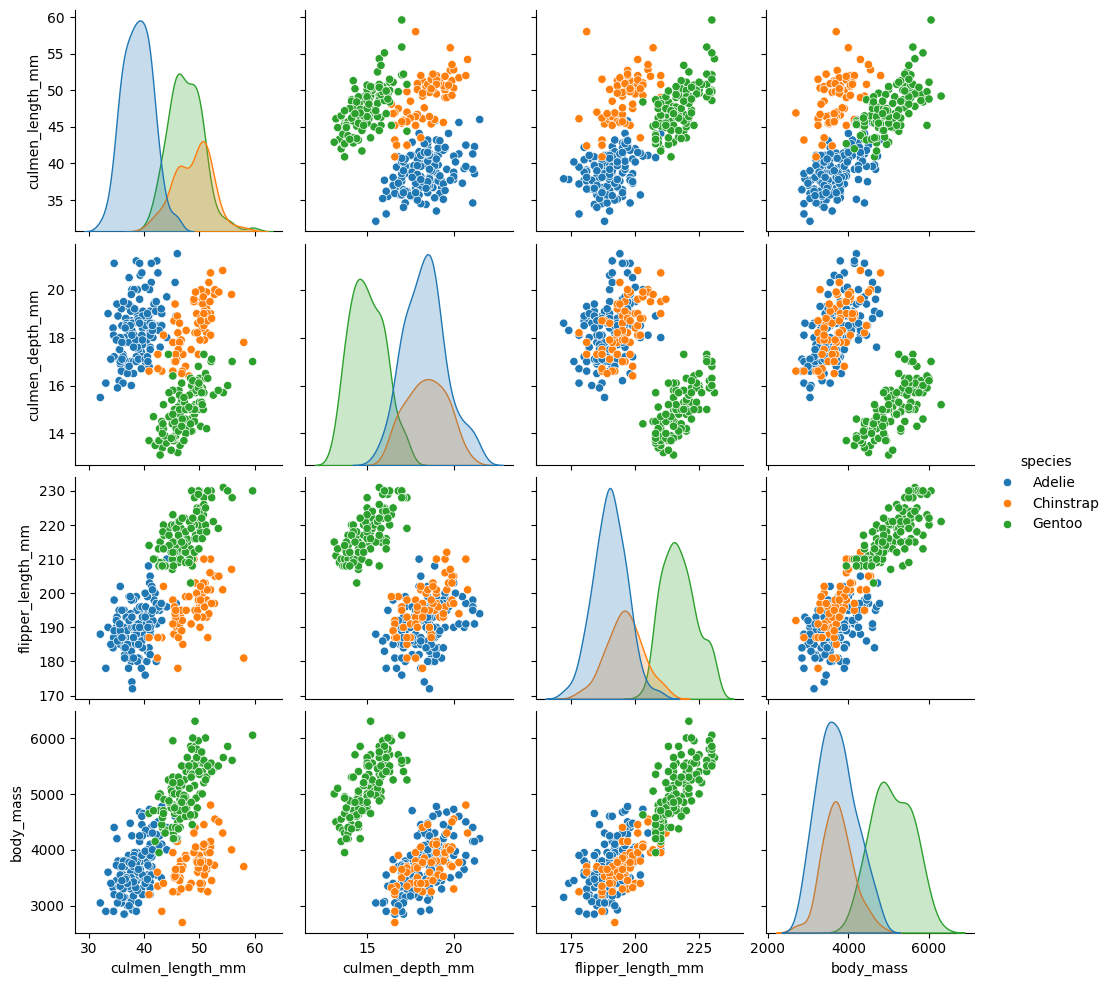

In [32]:
sns.pairplot(data, hue='species', height=2.5)

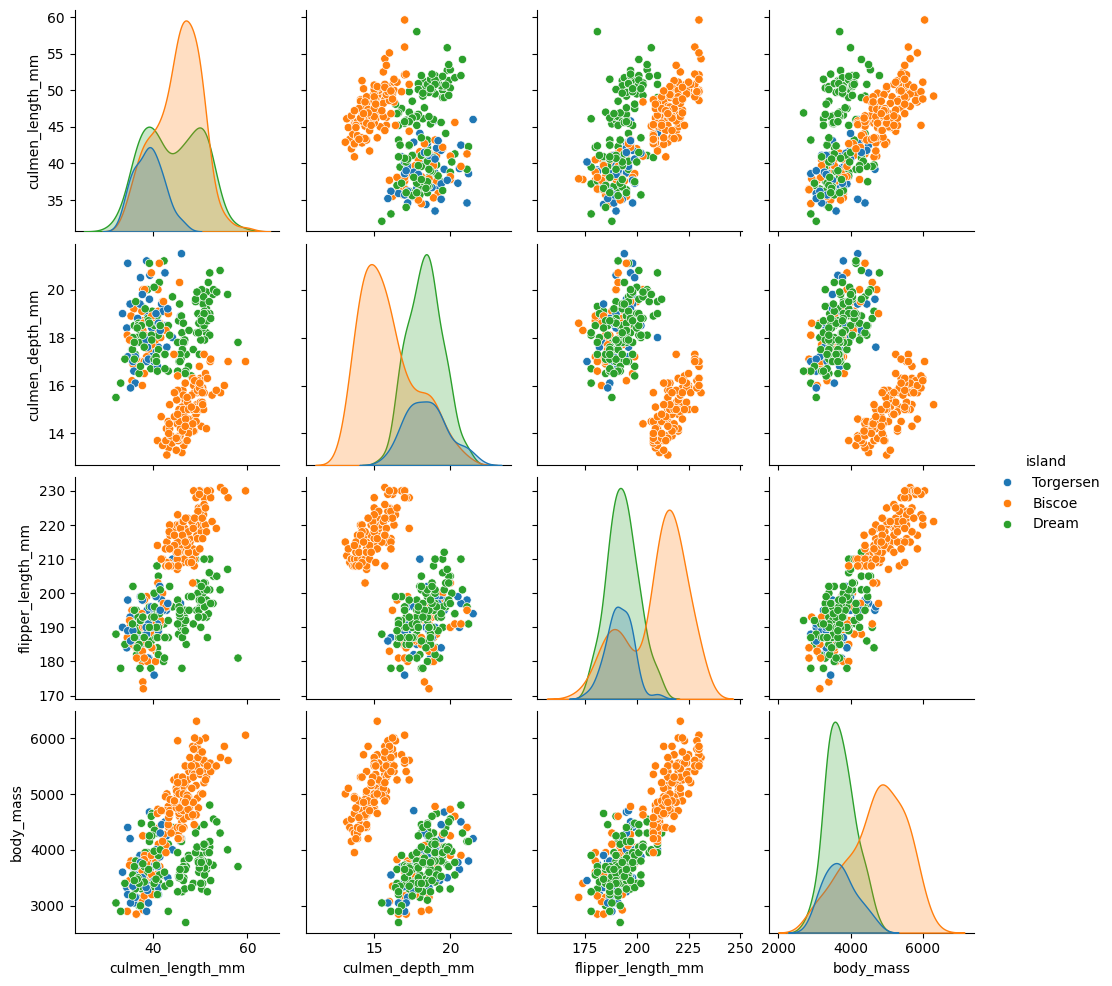

In [33]:
sns.pairplot(data, hue='island')

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

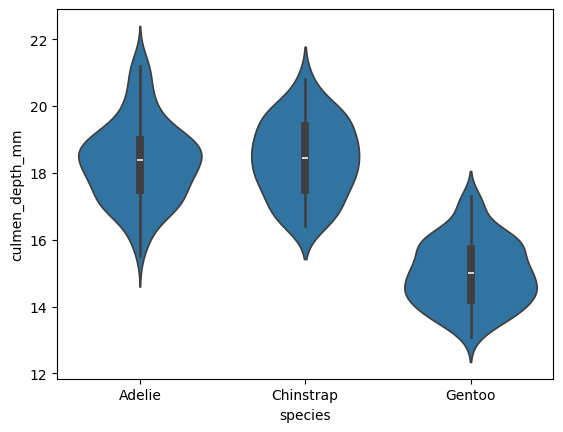

In [34]:
sns.violinplot(x='species', y='culmen_depth_mm', data=data)

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

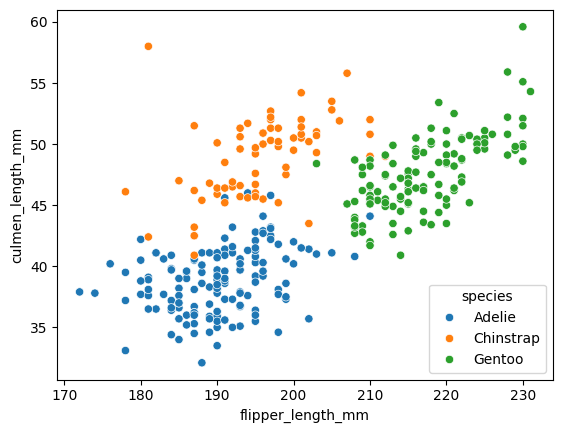

In [35]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='species', data=data)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X = data[['culmen_length_mm', 'flipper_length_mm']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [40]:
model.predict([[45, 220]])  # Example prediction

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

In [41]:
# save the model
import joblib
joblib.dump(model, 'penguin_model.pkl')

['penguin_model.pkl']

In [42]:
# load the model
loaded_model = joblib.load('penguin_model.pkl')
# Example prediction with the loaded model
loaded_model.predict([[45, 220]])  # Example prediction with loaded model

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

<Axes: xlabel='island', ylabel='count'>

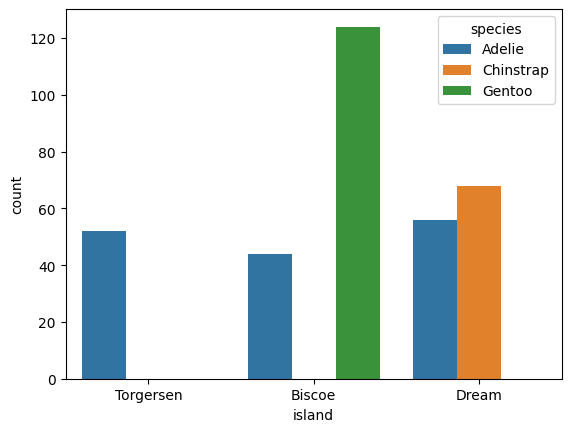

In [9]:
import seaborn as sns
import pandas as pd
data.dropna(inplace=True)
data = pd.read_csv('penguins_size.csv')
sns.countplot(data=data, x='island', hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

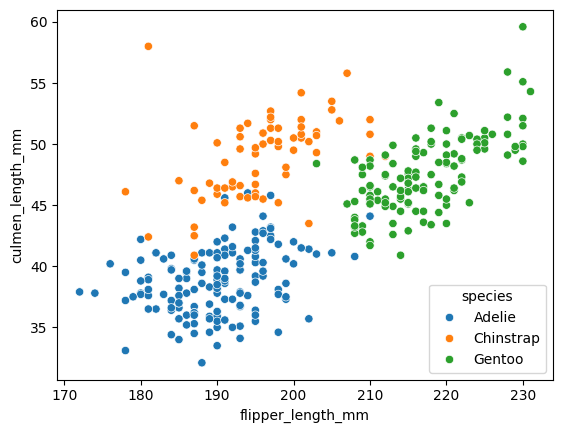

In [10]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='species', data=data)


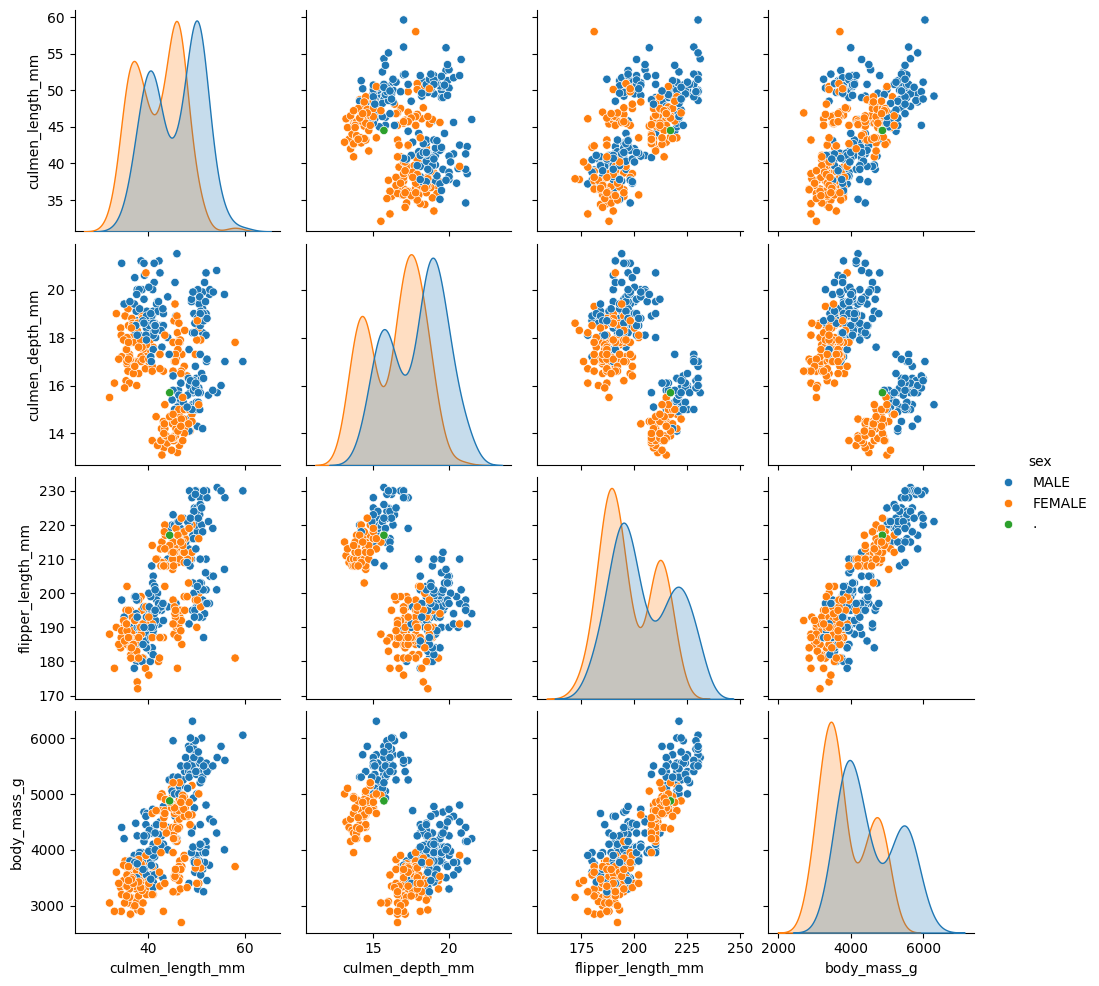

In [11]:
sns.pairplot(data, hue='sex')


In [12]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
# drop all rows with missing values
data.dropna(inplace=True)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


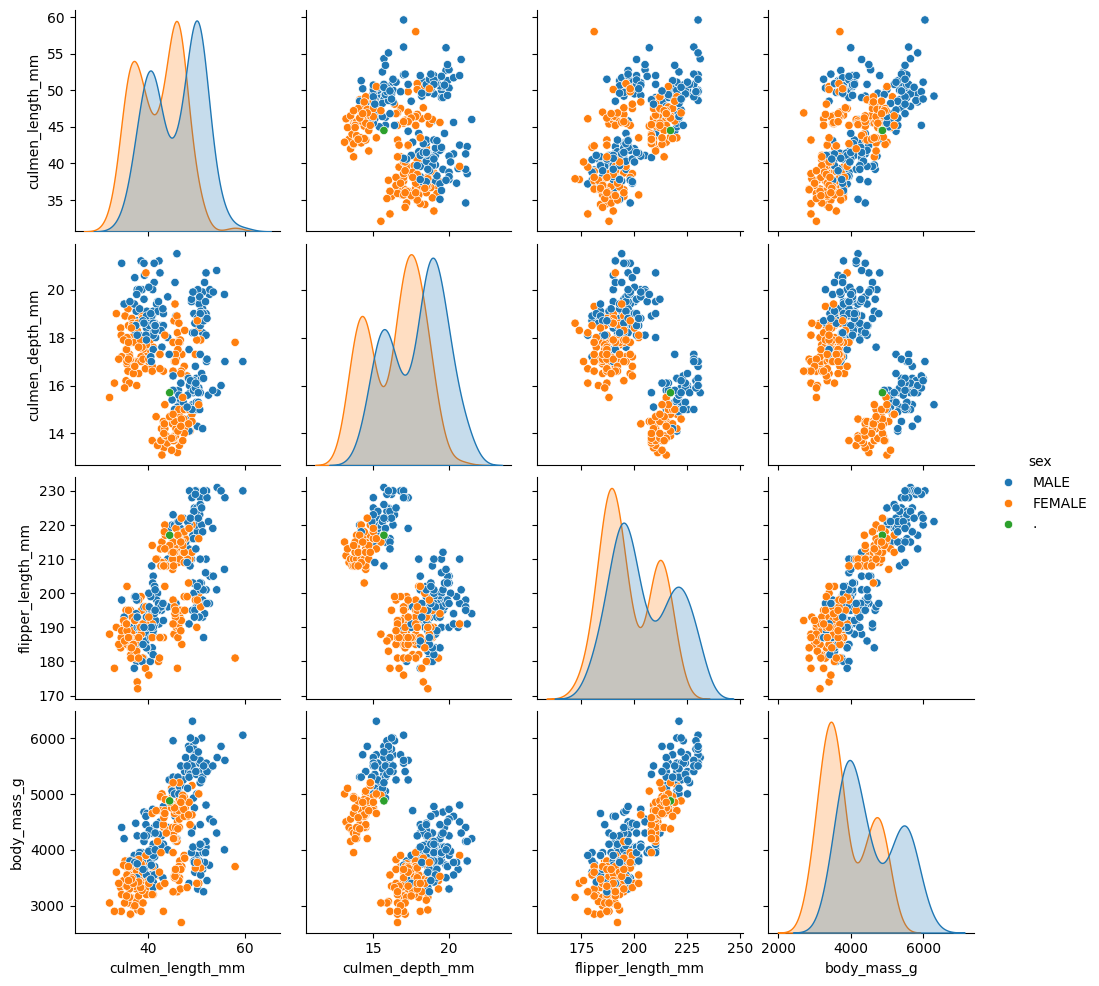

In [15]:
sns.pairplot(data, hue='sex')

<Axes: xlabel='species', ylabel='count'>

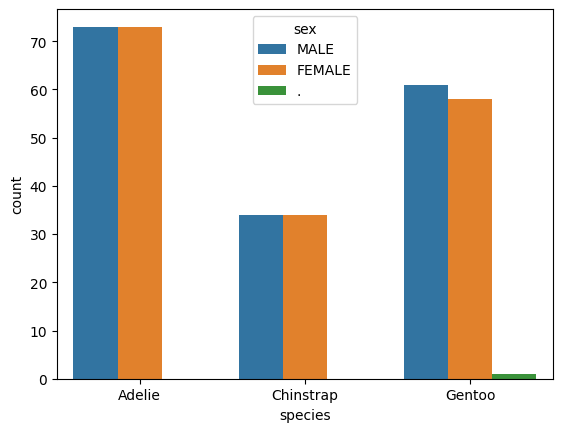

In [16]:
sns.countplot(data, x='species', hue='sex')

<Axes: xlabel='species', ylabel='culmen_length_mm'>

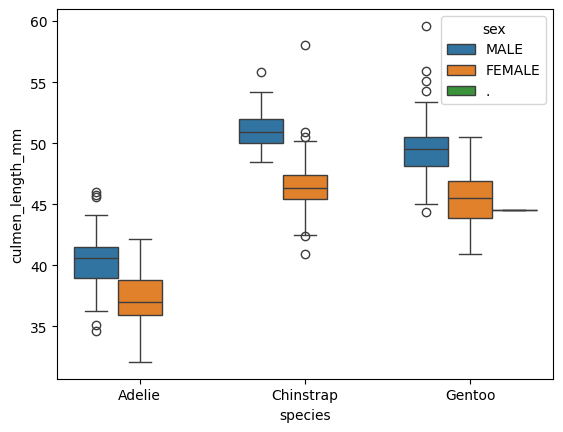

In [19]:
sns.boxplot(data, x='species', y='culmen_length_mm', hue='sex')

In [21]:
#dropp all rows with "." in sex column
data.drop(data[data['sex'] == '.'].index, inplace=True)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

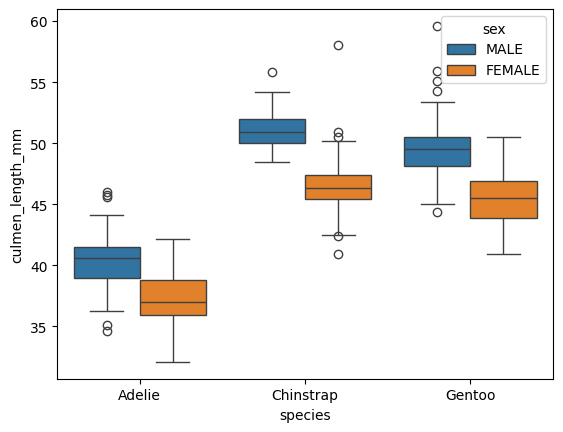

In [22]:
sns.boxplot(data, x='species', y='culmen_length_mm', hue='sex')

<Axes: xlabel='island', ylabel='count'>

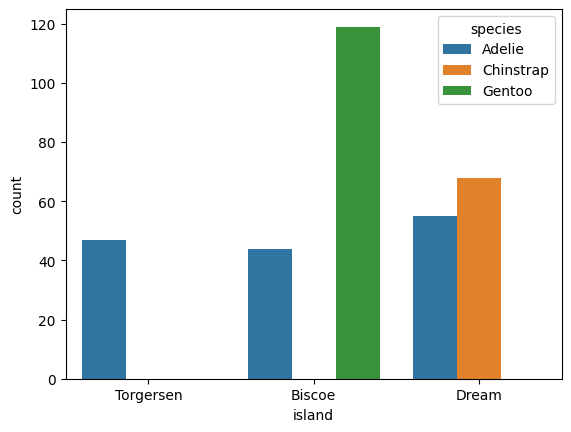

In [23]:
sns.countplot(data=data, x='island', hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

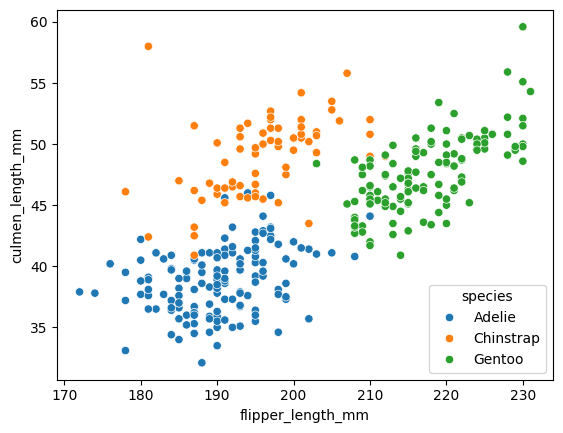

In [24]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='species', data=data)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['island_id'] = le.fit_transform(data['island'])
X = data[['culmen_length_mm', 'flipper_length_mm', 'island_id']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)    
model.fit(X_train, y_train)

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [35]:
model.predict([[45, 220, 0]])

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

In [42]:
import joblib
joblib.dump(model, 'penguin_model_species.pkl')
# load the model
loaded_model_species = joblib.load('penguin_model_species.pkl')
# Example prediction with the loaded model
loaded_model_species.predict([[55, 220, 2]]) 

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Chinstrap'], dtype=object)

In [ ]:
loaded_model_species.predict([[55, 220, 0]]) 

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

In [43]:
le = LabelEncoder()
data['species_id'] = le.fit_transform(data['species'])

X = data[['culmen_length_mm', 'species_id']]
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)    
model.fit(X_train, y_train)

joblib.dump(model, 'penguin_model_sex.pkl')
loaded_model_sex = joblib.load('penguin_model_sex.pkl')
loaded_model_sex.predict([[45, 0]]) 

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['MALE'], dtype=object)